In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [37]:
base_weather = pd.read_csv('weatherAUS.csv')

In [38]:
base_weather.shape

(145460, 23)

In [39]:
base_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [40]:
base_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [41]:
base_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [42]:
print(base_weather.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


We need to remove the rows that in the "RainTomorrow" columns have the value "NaN".

In [47]:
base_weather = base_weather.dropna(subset=[column for column in base_weather.columns if base_weather[column].dtype == 'object'])


In [48]:
base_weather.shape

(142193, 23)

Handling null values ​​in each column. 

In [49]:
for column in base_weather.columns:
    if base_weather[column].dtype != 'object':
        base_weather[column].fillna(base_weather[column].mean(), inplace=True)

C:\Users\marco\AppData\Local\Temp\ipykernel_12304\4228452761.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_weather[column].fillna(base_weather[column].mean(), inplace=True)


In [50]:
print(base_weather.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [51]:
base_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,5.469824,7.624853,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,4.437189,4.503167,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,5.469824,7.624853,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.000000,4.503167,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,5.469824,7.624853,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,4.437189,4.503167,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,5.469824,7.624853,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,4.437189,4.503167,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,5.469824,7.624853,W,28.0,S,...,58.0,27.0,1007.0,1005.7,4.437189,4.503167,20.1,28.2,Yes,No


In [52]:
weather_X = base_weather.drop('RainTomorrow', axis=1)

weather_Y = base_weather['RainTomorrow']

Transformando Colunas Catégoricas para valores numéricos. 


In [53]:
weather_X = pd.get_dummies(weather_X)

Agora, dividiremos um conjunto treino e um teste.

In [54]:
from sklearn.model_selection import train_test_split

# Dividiremos 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(weather_X, weather_Y, test_size=0.2, random_state=42)

Agora podemos fazer a normalização dos valores para que o algoritmo de regressão fique mais acertivo.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Agora podemos iniciar o processo de regressão.

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression()
# Treinamento do modelo
model.fit(X_train, y_train)

LogisticRegression()

Agora com o modelo treinado, podemos fazer a previsões.

In [57]:
Y_pred = model.predict(X_test)

Avaliação do modelo:

1. Acurácia Geral

In [58]:
print("Acurácia:", accuracy_score(y_test, Y_pred))

Acurácia: 0.8491508140229966


2. Matriz de confusão

In [59]:
cm = confusion_matrix(y_test, Y_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[20619  1479]
 [ 2811  3530]]


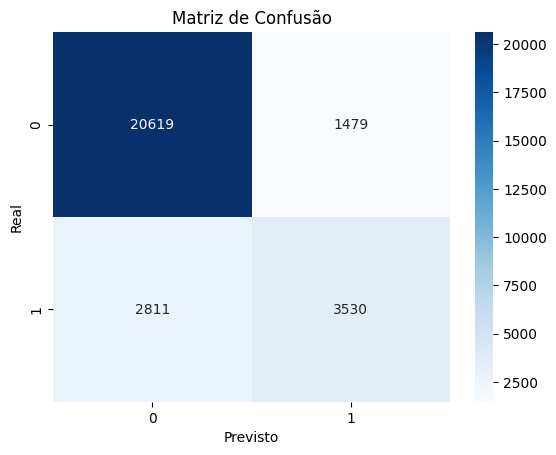

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

for column in base_weather.columns:
    if base_weather[column].dtype == 'object':
        base_weather[column] = LabelEncoder.fit_transform(base_weather[column])

In [62]:
base_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
5,401,2,14.6,29.7,0.2,5.469824,7.624853,14,56.0,13,...,55.0,23.0,1009.2,1005.4,4.437189,4.503167,20.6,28.9,0,0
6,402,2,14.3,25.0,0.0,5.469824,7.624853,13,50.0,12,...,49.0,19.0,1009.6,1008.2,1.000000,4.503167,18.1,24.6,0,0
7,403,2,7.7,26.7,0.0,5.469824,7.624853,13,35.0,10,...,48.0,19.0,1013.4,1010.1,4.437189,4.503167,16.3,25.5,0,0
8,404,2,9.7,31.9,0.0,5.469824,7.624853,6,80.0,9,...,42.0,9.0,1008.9,1003.6,4.437189,4.503167,18.3,30.2,0,1
9,405,2,13.1,30.1,1.4,5.469824,7.624853,13,28.0,8,...,58.0,27.0,1007.0,1005.7,4.437189,4.503167,20.1,28.2,1,0


In [64]:
## data_encoded  = pd.get_dummies(base_weather, columns=[column for column in base_weather.columns if base_weather[column].dtype == 'object'], drop_first=True)
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
Y_pred = model.predict(X_test)

In [66]:
print("Acurácia:", accuracy_score(y_test, Y_pred))

Acurácia: 0.8491508140229966


In [68]:
correlation_matrix = base_weather.corr()

correlation_matrix

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.021490,0.016930,0.040321,-0.012453,0.060081,0.010147,-0.024504,-0.025140,-0.011780,...,0.000940,-0.010464,0.033430,0.027625,0.050723,0.032333,0.027114,0.027682,-0.007994,-0.010947
Location,0.021490,1.000000,-0.006194,-0.020490,-0.003457,0.032114,0.002144,-0.022076,0.069269,-0.023564,...,-0.002065,0.011066,0.036492,0.046345,-0.010908,-0.015860,-0.015596,-0.022718,0.001831,-0.003579
MinTemp,0.016930,-0.006194,1.000000,0.733919,0.103314,0.353698,0.051907,-0.124547,0.173331,-0.123712,...,-0.232372,0.005913,-0.424357,-0.434034,0.061460,0.015902,0.897999,0.699828,0.052383,0.083717
MaxTemp,0.040321,-0.020490,0.733919,1.000000,-0.074202,0.442214,0.331505,-0.206055,0.066329,-0.246462,...,-0.499777,-0.499725,-0.309093,-0.397422,-0.226776,-0.214469,0.880087,0.969735,-0.213940,-0.159087
Rainfall,-0.012453,-0.003457,0.103314,-0.074202,1.000000,-0.038186,-0.173011,0.044474,0.127250,0.064910,...,0.221392,0.249609,-0.159676,-0.120366,0.171613,0.145848,0.011384,-0.077553,0.461230,0.236874
Evaporation,0.060081,0.032114,0.353698,0.442214,-0.038186,1.000000,0.290375,-0.070434,0.147371,-0.093563,...,-0.377594,-0.289915,-0.211823,-0.231341,-0.152224,-0.147763,0.417323,0.429195,-0.132227,-0.089551
Sunshine,0.010147,0.002144,0.051907,0.331505,-0.173011,0.290375,1.000000,-0.065801,-0.022479,-0.082021,...,-0.351980,-0.446849,0.030932,-0.015477,-0.537714,-0.559379,0.210174,0.349271,-0.225129,-0.327029
WindGustDir,-0.024504,-0.022076,-0.124547,-0.206055,0.044474,-0.070434,-0.065801,1.000000,0.130476,0.357879,...,0.071468,0.071489,-0.112680,-0.027536,0.064201,0.055652,-0.168185,-0.216546,0.120754,0.054488
WindGustSpeed,-0.025140,0.069269,0.173331,0.066329,0.127250,0.147371,-0.022479,0.130476,1.000000,-0.048256,...,-0.209272,-0.025822,-0.426600,-0.384642,0.052281,0.080202,0.146756,0.032274,0.140983,0.225264
WindDir9am,-0.011780,-0.023564,-0.123712,-0.246462,0.064910,-0.093563,-0.082021,0.357879,-0.048256,1.000000,...,0.200459,0.161330,0.027013,0.102082,0.087792,0.051613,-0.200768,-0.246699,0.138636,0.018436
